In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape # Dimensions

(18249, 14)

In [4]:
df.info() # detailed information of the dataset in term of null stypes, columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [6]:
df.isna().sum() # finding the null values of the dataset

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace=True) # removing the irrelvent data column which contain no information

In [8]:
df.shape

(18249, 13)

In [9]:
df.describe() #statistical description

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
df.columns # total columns in the dataset

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [11]:
df.nunique() # finding the unique values

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [12]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [13]:
# splitting the date column into dae ,monnth and Year
df['Year'],df['Month'],df['Dates']=df['Date'].str.split('-').str
df.drop(columns=['Date', 'year'],inplace=True)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Dates
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12,06
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,02,04
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,01,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,01,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,01,14


## Visualizating the data using different graphs

In [14]:
# counting number of conventional and organic avocado's
print(df['type'].value_counts())

conventional    9126
organic         9123
Name: type, dtype: int64


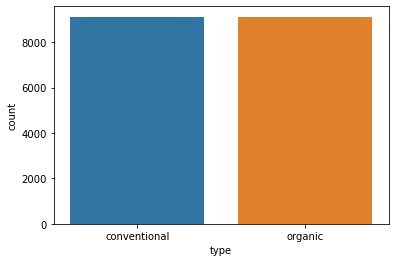

In [15]:
# count plot fo type column
sns.countplot(x='type', data=df)
plt.show()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64


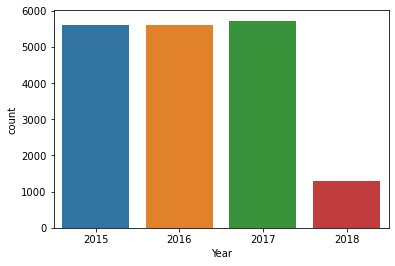

In [16]:
print(df['Year'].value_counts())
sns.countplot(x='Year',data=df)
plt.show()

01    1944
03    1836
02    1728
10    1512
05    1512
07    1512
08    1404
11    1404
04    1404
12    1403
09    1296
06    1294
Name: Month, dtype: int64


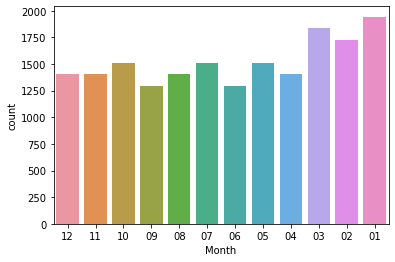

In [17]:
print(df['Month'].value_counts())
sns.countplot(x='Month',data=df)
plt.show()

11    756
04    756
18    755
25    755
10    648
24    648
19    648
01    648
05    648
17    648
08    648
15    648
26    648
03    648
12    648
22    648
14    540
29    540
21    540
28    540
07    540
20    540
13    540
27    540
06    539
31    432
09    432
16    432
02    432
30    432
23    432
Name: Dates, dtype: int64


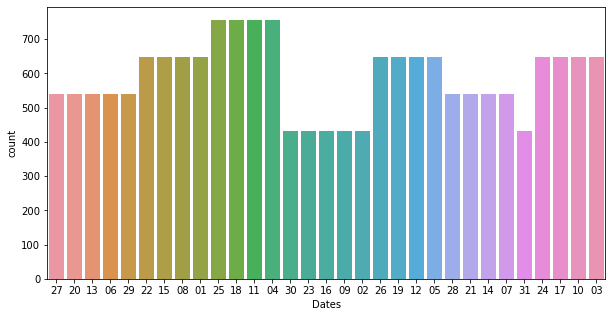

In [18]:
print(df['Dates'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x='Dates',data=df)
plt.show()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
2.91      1
2.68      1
3.04      1
3.17      1
3.03      1
Name: AveragePrice, Length: 259, dtype: int64


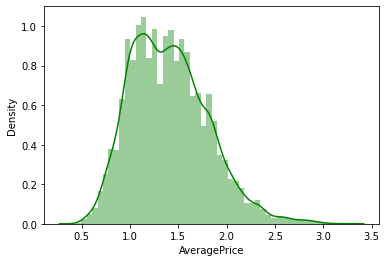

In [19]:
print(df['AveragePrice'].value_counts())
sns.distplot(df['AveragePrice'],color='g')
plt.show()

In [20]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['Dates']=df['Dates'].astype(int)
# df.drop(columns=['Dates'],inplace=True)

In [21]:
#checking th categorical columns
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_col.append(i)
print(cat_col)

['type', 'region']


In [22]:
num=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        num.append(i)
print(num)
    

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Year', 'Month', 'Dates']


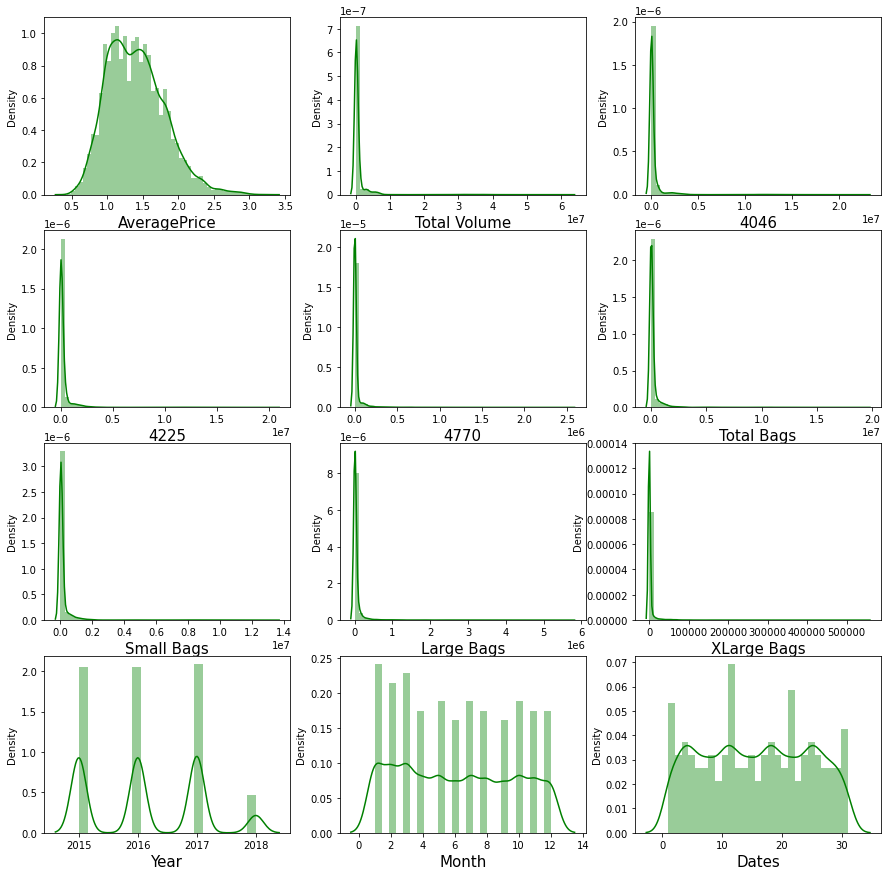

In [23]:
plt.figure(figsize=(15,15))
plotnumber=1

for i in num:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df[i], color='g')
        plt.xlabel(i,fontsize=15)
    plotnumber+=1
plt.show()

In [24]:
# sns.pairplot(df)

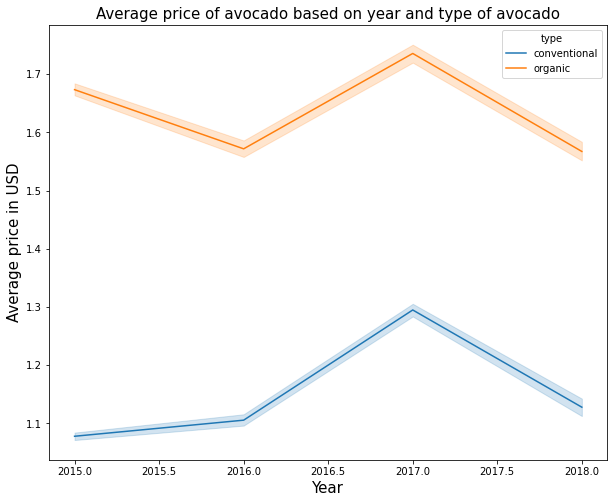

In [25]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Year', y='AveragePrice', hue='type', data=df)
plt.title('Average price of avocado based on year and type of avocado',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Average price in USD',fontsize=15)
plt.show()

In [26]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['region']=oe.fit_transform(df['region'].values.reshape(-1,1))
df['type']=oe.fit_transform(df['type'].values.reshape(-1,1))
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Dates
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1.0,53.0,2018,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1.0,53.0,2018,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1.0,53.0,2018,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1.0,53.0,2018,1,14


## Box Plot

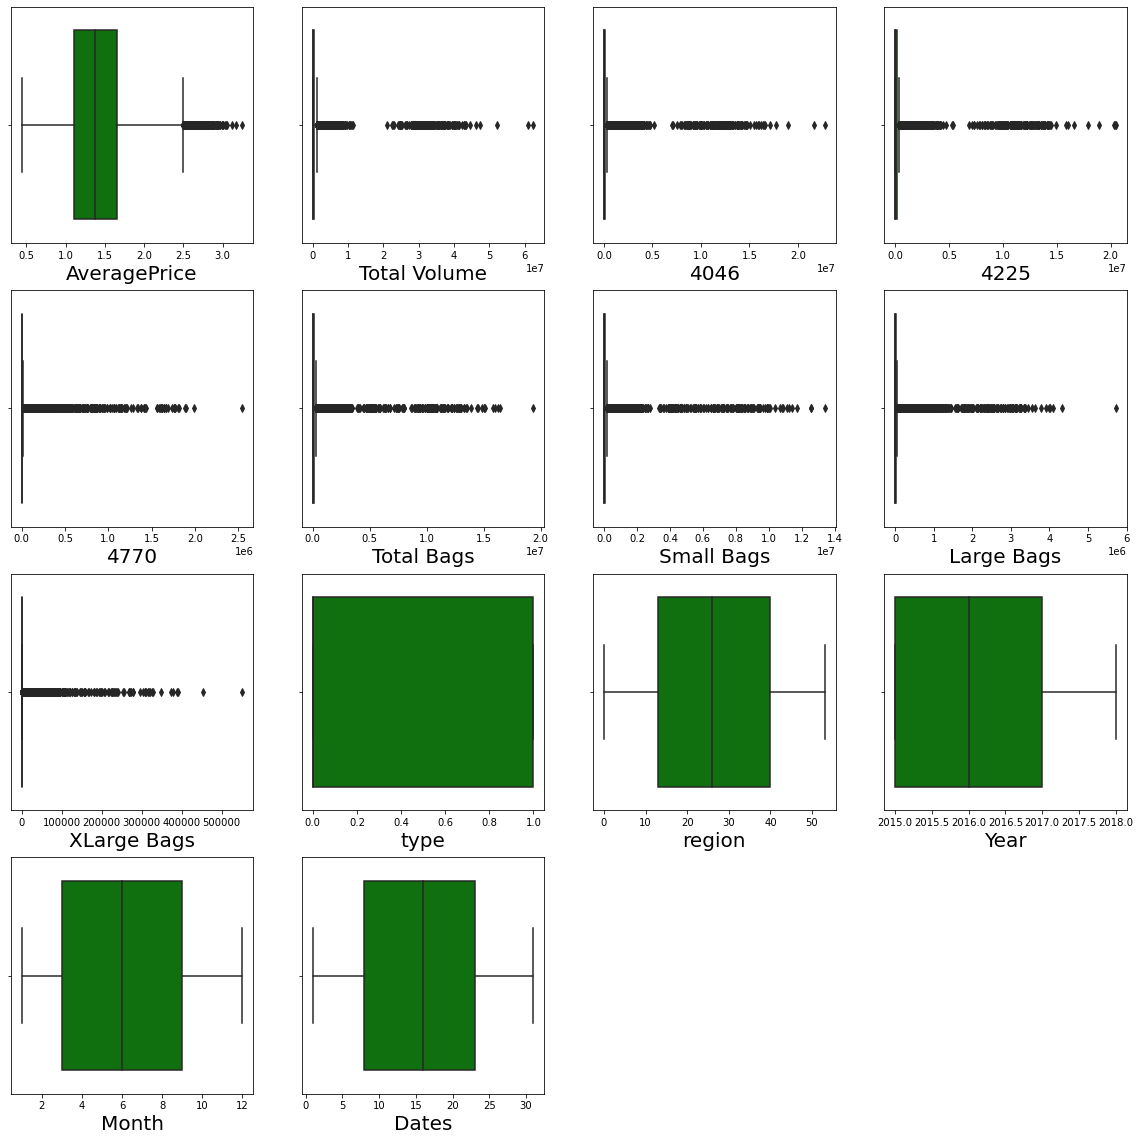

In [27]:
# from boxplot we understand how data is divide and also find outlier in the dataset
plt.figure(figsize=(20,20))
plotnum=1

for i in df:
    if plotnum<=14:
        ax=plt.subplot(4,4,plotnum)
        sns.boxplot(df[i],color='g')
        plt.xlabel(i,fontsize=20)
    plotnum+=1
plt.show()

In [28]:
# orrelation matrix
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Dates
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,-0.011716,0.093197,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.174176,0.017193,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.192073,0.003353,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,0.145726,-0.009559,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,0.095252,-0.036531,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.175256,0.071552,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.164702,0.063915,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.198768,0.087891,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.082281,0.081033,-0.012969,0.000319
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000280,-0.000032,-0.000085,-0.000013


## Heatmap

<AxesSubplot:>

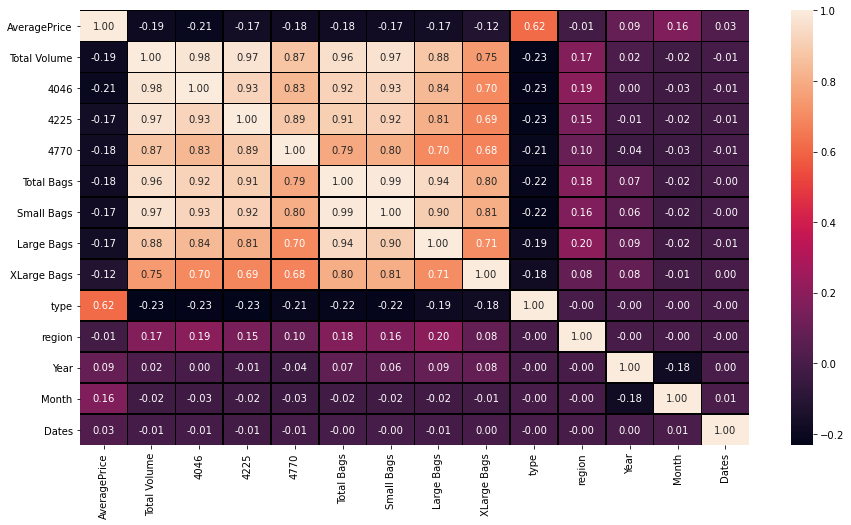

In [29]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, linewidth=0.5, linecolor='black', fmt='.2f')

## Zscore for removal of outliers

In [30]:
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [31]:
print(df.shape)
print(df_new.shape)

(18249, 14)
(17651, 14)


In [32]:
# percentage loss of data
loss=(18249-17651)/18249*100
loss

3.276891884486821

using zscore 3.27% data is loss which is fine ,we can go ahead with this for model

In [33]:
df_new.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
region          0.012798
Year            0.229976
Month           0.107408
Dates           0.011778
dtype: float64

## Splitting the dataset into X and Y Variable

In [34]:
x=df_new.drop('AveragePrice',axis=1)
y=df_new['AveragePrice']

In [35]:
sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x.head(5)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Dates
0,-0.392009,-0.349452,-0.278497,-0.322219,-0.429348,-0.400967,-0.379832,-0.259027,-1.019047,-1.695495,-1.210013,1.644612,1.289309
1,-0.401251,-0.350276,-0.303093,-0.321924,-0.426481,-0.397462,-0.379774,-0.259027,-1.019047,-1.695495,-1.210013,1.644612,0.491652
2,-0.338702,-0.350002,-0.141449,-0.319832,-0.431303,-0.403413,-0.379696,-0.259027,-1.019047,-1.695495,-1.210013,1.644612,-0.306004
3,-0.377438,-0.349235,-0.234593,-0.321511,-0.439577,-0.413717,-0.379277,-0.259027,-1.019047,-1.695495,-1.210013,1.644612,-1.103660
4,-0.405040,-0.349668,-0.305098,-0.321418,-0.438256,-0.412371,-0.378402,-0.259027,-1.019047,-1.695495,-1.210013,1.362113,1.517211


### PCA

In [36]:
pca=PCA(n_components=13, svd_solver='full')
x=pd.DataFrame(pca.fit_transform(x),columns=x.columns)
x.head(5)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Dates
0,-0.853454,-2.314728,0.845142,-1.345231,-0.680276,-0.984216,-0.678839,0.387816,-0.300023,-0.110142,-0.054082,0.000002,5.485647e-09
1,-0.863021,-2.303081,0.827048,-0.559126,-0.807140,-0.985040,-0.644002,0.408073,-0.294996,-0.109340,-0.080666,0.000002,5.194611e-09
2,-0.784126,-2.315589,0.815266,0.235337,-0.900431,-0.977736,-0.631105,0.321327,-0.323475,-0.158940,0.013937,0.000003,4.415637e-09
3,-0.839448,-2.296825,0.795336,1.018878,-1.037567,-0.984927,-0.587172,0.382197,-0.301600,-0.131582,-0.042122,0.000003,4.392087e-09
4,-0.873338,-2.157968,0.927547,-1.538476,-0.436850,-0.984341,-0.687833,0.452986,-0.294913,-0.119204,-0.060293,0.000002,5.014374e-09


### Power Transformer

In [37]:
from sklearn.preprocessing import PowerTransformer
p=PowerTransformer(method='yeo-johnson')
x=pd.DataFrame(p.fit_transform(x),columns=x.columns)
x.head(5)

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Dates
0,-0.235419,-2.301793,0.795838,-1.341836,-0.710962,-1.097206,-0.806069,0.527120,-0.444496,-0.169164,-0.134172,0.582185,0.027094
1,-0.251318,-2.289006,0.778804,-0.559396,-0.849547,-1.098011,-0.761633,0.554980,-0.436004,-0.167897,-0.197567,0.570313,0.025402
2,-0.123364,-2.302739,0.767712,0.233356,-0.951829,-1.090873,-0.745213,0.435731,-0.484222,-0.246223,0.028292,0.658038,0.020876
3,-0.212333,-2.282140,0.748949,1.017501,-1.102720,-1.097901,-0.689403,0.519393,-0.447163,-0.203010,-0.105632,0.631066,0.020740
4,-0.268583,-2.130279,0.873416,-1.533969,-0.446825,-1.097329,-0.817559,0.616775,-0.435863,-0.183467,-0.148989,0.611334,0.024355


### Variance inflation factor

In [38]:
vif=pd.DataFrame()
vif['features']=x.columns
vif['vif_features']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

vif

,features,vif_features
0,Total Volume,1.495254
1,4046,1.154974
2,4225,1.044442
3,4770,1.005827
4,Total Bags,1.112008
5,Small Bags,1.627763
6,Large Bags,1.102891
7,XLarge Bags,1.032273
8,type,1.006446
9,region,1.074128


In [39]:
x.skew()

Total Volume    0.428298
4046           -0.019177
4225           -0.017816
4770           -0.000329
Total Bags      0.009155
Small Bags      0.054890
Large Bags     -0.083745
XLarge Bags     0.074895
type           -0.449883
region          0.054683
Year            0.090623
Month          -1.584583
Dates           0.765469
dtype: float64

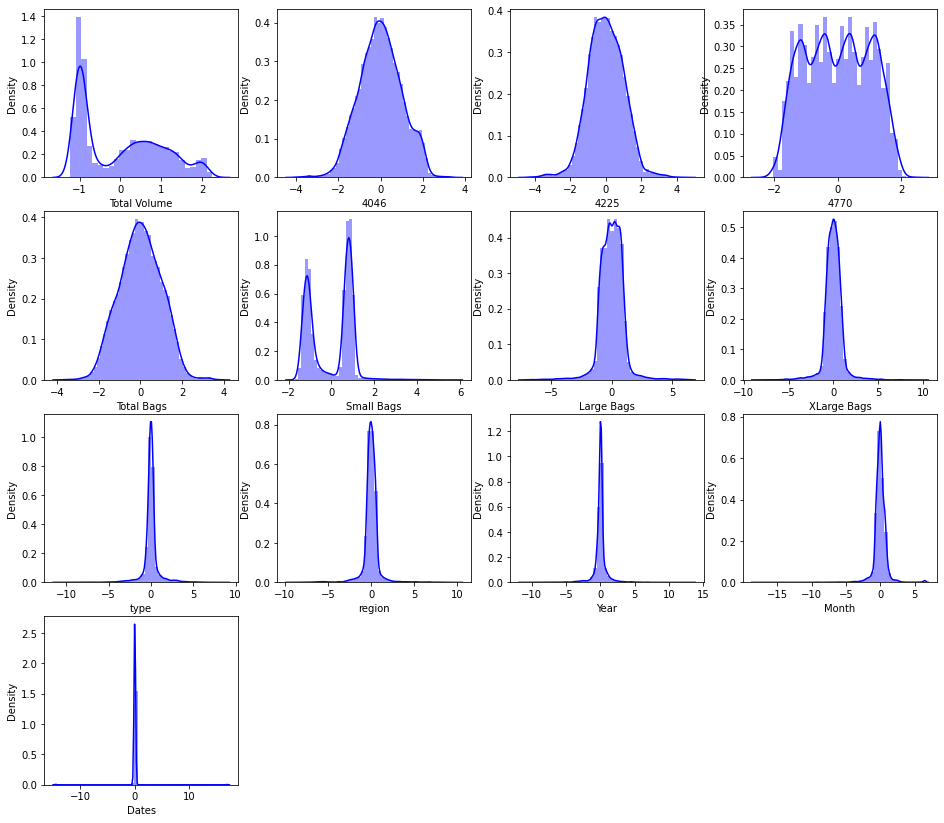

In [40]:
# Distribution plot after removal of outlier to see skewness in columns
pltnum=1 
plt.figure(figsize=(16,18))
for col in x:
    if pltnum<17:
        ax=plt.subplot(5,4,pltnum)
        sns.distplot(x[col],color='blue')
        pltnum+=1
    
plt.show()

In [41]:
df_new=df.drop('Dates',axis=1)
df_new.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.0,0.0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.0,0.0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0.0,0.0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.0,0.0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.0,0.0,2015,11


In [42]:
#linear Regression
max_acc=0
max_RS=0
for i in range(0,250):
    x_train,x_test,y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>max_acc:
        max_acc=acc
        max_RS=i
print( 'Best r2 score is', max_acc ,'on random state', max_RS)

Best r2 score is 0.48313741247372044 on random state 6


## creating training and testing dataset

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=6)

# Machine Learning model with regression and evaluation metrics

In [44]:
def reg(model,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=6)
    
    model.fit(x_train,y_train) #trainnng the model
    
    pred=model.predict(x_test) 
    
    rmse=mean_squared_error(y_test,pred,squared=False)  # findthe root mean squared error value
    print('RMSE is:',rmse)
    
    r2=r2_score(y_test,pred)*100 # finding r2 score value
    print('r2 score is:',r2)

    cvs=(cross_val_score(model,x,y,cv=5).mean())*100 # cross validation score
    print('Cross validation score is:', cvs)
    
    result=r2-cvs
    print('R2 score -Cross validation score is:', result)
    

In [45]:
model=LinearRegression()
reg(model,x,y)

RMSE is: 0.2803833227307343
r2 score is: 48.31374124737204
Cross validation score is: 10.437075557350111
R2 score -Cross validation score is: 37.87666569002193


In [46]:
#Lasso Regressor
from sklearn.linear_model import Lasso, Ridge
model=Lasso()
reg(model,x,y)

RMSE is: 0.3900323822459629
r2 score is: -0.01659666075202182
Cross validation score is: -115.6669674837169
R2 score -Cross validation score is: 115.65037082296487


In [47]:
#Ridge Regressor
model=Ridge(alpha=0.01,normalize=True)
reg(model,x,y)

RMSE is: 0.28048346757957154
r2 score is: 48.27681296719829
Cross validation score is: 10.504322436965785
R2 score -Cross validation score is: 37.7724905302325


In [48]:
#Suport Vector Regressor
from sklearn.svm import SVR
model=SVR()
reg(model,x,y)

RMSE is: 0.22558676242052675
r2 score is: 66.54215507282231
Cross validation score is: -0.4255450510415204
R2 score -Cross validation score is: 66.96770012386384


In [49]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(max_depth=2, max_features='sqrt')
reg(model,x,y)

RMSE is: 0.3034283178841974
r2 score is: 39.46828757096347
Cross validation score is: -13.537231434887861
R2 score -Cross validation score is: 53.005519005851326


In [50]:
#KNeighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model,x,y)

RMSE is: 0.27258485644942987
r2 score is: 51.148917615224974
Cross validation score is: -9.177690008653009
R2 score -Cross validation score is: 60.32660762387798


In [51]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion='poisson')
reg(model,x,y)

RMSE is: 0.33326499412764554
r2 score is: 26.978602982616117
Cross validation score is: -182.76123792890496
R2 score -Cross validation score is: 209.73984091152107


In [52]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(loss='quantile',n_estimators=200,max_depth=5)
reg(model,x,y)

RMSE is: 0.3914182412085005
r2 score is: -0.7286152266118728
Cross validation score is: -92.94536586142513
R2 score -Cross validation score is: 92.21675063481325


In [53]:
#AdaBoost Regressor
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor(n_estimators=200,learning_rate=1.05)
reg(model,x,y)

RMSE is: 0.2781785090785906
r2 score is: 49.12342213192633
Cross validation score is: -2.2365542235417
R2 score -Cross validation score is: 51.359976355468035


In [54]:
# XGB Regressor
from xgboost import XGBRegressor
model=XGBRegressor()
reg(model,x,y)

RMSE is: 0.19212079764384435
r2 score is: 75.73280928141051
Cross validation score is: -5.088323196226399
R2 score -Cross validation score is: 80.82113247763691


## Hypertunning Parameter for selected model

In [84]:
from sklearn.model_selection import GridSearchCV
param={'n_estimators':[200,400,600],'gamma':[2.0,3.0,4.0],'n_jobs':[-2,1,1],'max_depth':[4,6,8]}
grid_CV=GridSearchCV(XGBRegressor(),param,cv=5)

In [ ]:
grid_CV.fit(x_train,y_train)

In [ ]:
grid_CV.best_params_

In [236]:
Best_Model = XGBRegressor(gamma=2.0, max_depth=8, n_estimators=100, n_jobs=-2)
Best_Model.fit(x_train,y_train)
grid_pred=Best_Model.predict(x_test)
grid_r2 = r2_score(y_test,grid_pred)*100
print("R2 score for the Best Model is:", grid_r2)

R2 score for the Best Model is: 65.08897177106078


we successfully incorporated the Hypert uning parameter on Best Model and received the r2 score for it.

# Using classification model for region column as target variable

In [55]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [56]:
df1=pd.read_csv(r'C:\Users\Admin\Desktop\avocado.csv')
df1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [57]:
df1['Year'],df1['Month'],df1['Dates']=df1['Date'].str.split('-').str
df1.drop(columns=['Date', 'year'],inplace=True)

In [58]:
df1['Year']=df1['Year'].astype(int)
df1['Month']=df1['Month'].astype(int)
df1['Dates']=df1['Dates'].astype(int)
df1.drop(columns=['Dates'],inplace=True)

In [59]:
df1.drop(['Unnamed: 0','4046', '4225', '4770','Small Bags','Large Bags','XLarge Bags'],axis=1,inplace=True)


In [60]:
df1.head()

,AveragePrice,Total Volume,Total Bags,type,region,Year,Month
0,1.33,64236.62,8696.87,conventional,Albany,2015,12
1,1.35,54876.98,9505.56,conventional,Albany,2015,12
2,0.93,118220.22,8145.35,conventional,Albany,2015,12
3,1.08,78992.15,5811.16,conventional,Albany,2015,12
4,1.28,51039.60,6183.95,conventional,Albany,2015,11


In [61]:
oe = OrdinalEncoder()
df1['region']=oe.fit_transform(df1['region'].values.reshape(-1,1))
df1['type']=oe.fit_transform(df1['type'].values.reshape(-1,1))

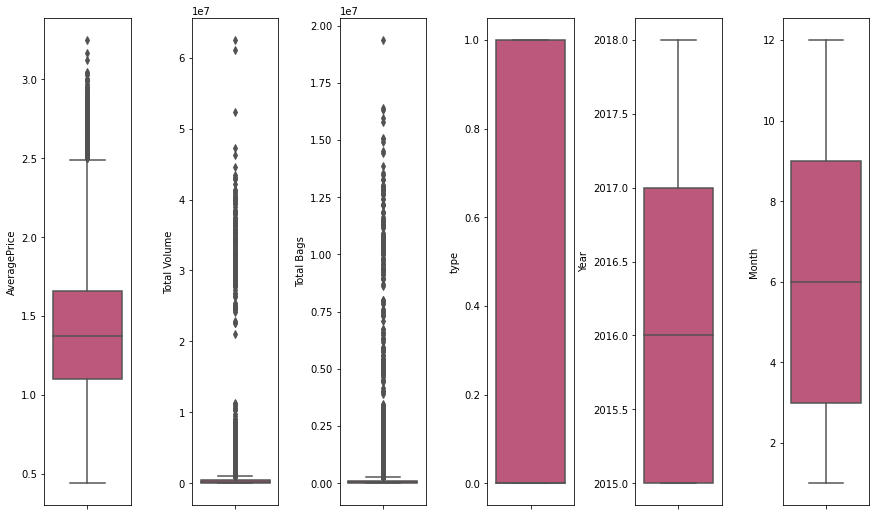

In [62]:
# from boxplot we understand how data is divide and also find outlier in the dataset
fig, ax = plt.subplots(ncols=6, nrows=1, figsize=(12,7))
index = 0
features = df1.drop("region", axis=1)
ax = ax.flatten()
for col, value in features.items():
    sns.boxplot(y=col, data=df1, ax=ax[index], palette="plasma")
    index += 1
plt.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0)
plt.show()

In [63]:
z = np.abs(zscore(df1))
threshold = 3
np.where(z>3)
df1_new = df1[(z<3).all(axis=1)]


In [64]:
print(df1.shape)
print(df1_new.shape)

(18249, 7)
(17931, 7)


In [65]:
df1.skew()

AveragePrice    0.580303
Total Volume    9.007687
Total Bags      9.756072
type            0.000329
region          0.000030
Year            0.215339
Month           0.106617
dtype: float64

In [66]:
x1=df1_new.drop('region',axis=1)
y1=df1_new['region']

In [67]:
from sklearn.preprocessing import power_transform
x1=power_transform(x1,method="yeo-johnson")

In [68]:
df1_new.skew()

AveragePrice    0.388855
Total Volume    3.544630
Total Bags      4.165621
type           -0.005912
region          0.014808
Year            0.225227
Month           0.114771
dtype: float64

In [69]:
x1 = df1_new.drop('region',axis=1)
y1 = df1_new['region']

In [70]:
sc=StandardScaler()
x1 = pd.DataFrame(sc.fit_transform(x1), columns=x1.columns)
x1.head()

,AveragePrice,Total Volume,Total Bags,type,Year,Month
0,-0.179547,-0.396584,-0.413139,-1.00296,-1.215795,1.650340
1,-0.127800,-0.404396,-0.410836,-1.00296,-1.215795,1.650340
2,-1.214487,-0.351527,-0.414710,-1.00296,-1.215795,1.650340
3,-0.826385,-0.384268,-0.421359,-1.00296,-1.215795,1.650340
4,-0.308915,-0.407599,-0.420297,-1.00296,-1.215795,1.367566


### splitting the data into train and test

In [71]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=200)

In [72]:
# Classification Model Function

def classify(model, x1, y1):
    x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=200)
    
    # Training the model
    model.fit(x1_train, y1_train)
    
    # Predicting Y_test
    pred = model.predict(x1_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y1_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y1_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x1, y1, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [73]:
# Logistic Regression

model=LogisticRegression()
classify(model,x1,y1)

Accuracy Score: 18.514387686816864

Classification Report:
               precision    recall  f1-score   support

         0.0       0.16      0.62      0.25        77
         1.0       0.00      0.00      0.00        97
         2.0       0.56      0.33      0.41        83
         3.0       0.08      0.31      0.13        75
         4.0       0.22      0.10      0.14        79
         5.0       0.23      0.17      0.20        80
         6.0       0.29      0.45      0.35        80
         7.0       0.06      0.08      0.07        73
         8.0       0.32      0.24      0.27        97
         9.0       0.20      0.40      0.27        82
        10.0       0.05      0.08      0.06        79
        11.0       0.27      0.11      0.16        90
        12.0       0.17      0.26      0.21        92
        13.0       0.08      0.18      0.11        65
        14.0       0.00      0.00      0.00        93
        15.0       0.33      0.01      0.02        97
        16.0       0.

In [74]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto')
classify(model,x1,y1)

Accuracy Score: 19.80816417577515

Classification Report:
               precision    recall  f1-score   support

         0.0       0.08      0.13      0.10        77
         1.0       0.29      0.07      0.12        97
         2.0       0.68      0.39      0.49        83
         3.0       0.14      0.09      0.11        75
         4.0       0.09      0.06      0.07        79
         5.0       0.15      0.20      0.17        80
         6.0       0.45      0.50      0.48        80
         7.0       0.05      0.10      0.06        73
         8.0       0.42      0.23      0.30        97
         9.0       0.13      0.22      0.16        82
        10.0       0.04      0.04      0.04        79
        11.0       0.14      0.23      0.18        90
        12.0       0.25      0.18      0.21        92
        13.0       0.10      0.15      0.12        65
        14.0       1.00      0.01      0.02        93
        15.0       0.55      0.28      0.37        97
        16.0       0.0

In [75]:
# Decision Tree Classifier

model=DecisionTreeClassifier(max_depth=15)
classify(model,x1,y1)

Accuracy Score: 44.59067588668302

Classification Report:
               precision    recall  f1-score   support

         0.0       0.56      0.74      0.64        77
         1.0       0.28      0.23      0.25        97
         2.0       0.64      0.59      0.61        83
         3.0       0.46      0.43      0.44        75
         4.0       0.51      0.62      0.56        79
         5.0       0.42      0.35      0.38        80
         6.0       0.68      0.71      0.70        80
         7.0       0.27      0.48      0.34        73
         8.0       0.70      0.65      0.67        97
         9.0       0.34      0.37      0.35        82
        10.0       0.21      0.19      0.20        79
        11.0       0.42      0.44      0.43        90
        12.0       0.44      0.48      0.46        92
        13.0       0.20      0.28      0.23        65
        14.0       0.42      0.30      0.35        93
        15.0       0.56      0.44      0.49        97
        16.0       0.4

In [76]:
model=RandomForestClassifier(max_depth=15)
classify(model,x1,y1)

Accuracy Score: 58.13071603836717

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.92      0.81        77
         1.0       0.54      0.38      0.45        97
         2.0       0.70      0.76      0.73        83
         3.0       0.61      0.47      0.53        75
         4.0       0.66      0.77      0.71        79
         5.0       0.62      0.66      0.64        80
         6.0       0.81      0.84      0.82        80
         7.0       0.41      0.66      0.50        73
         8.0       0.74      0.84      0.79        97
         9.0       0.45      0.38      0.41        82
        10.0       0.37      0.30      0.33        79
        11.0       0.52      0.61      0.56        90
        12.0       0.67      0.63      0.65        92
        13.0       0.29      0.38      0.33        65
        14.0       0.67      0.61      0.64        93
        15.0       0.71      0.52      0.60        97
        16.0       0.6

In [77]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model,x1,y1)

Accuracy Score: 20.923488735221948

Classification Report:
               precision    recall  f1-score   support

         0.0       0.10      0.21      0.13        77
         1.0       0.11      0.20      0.14        97
         2.0       0.24      0.36      0.29        83
         3.0       0.16      0.24      0.19        75
         4.0       0.15      0.23      0.18        79
         5.0       0.15      0.30      0.20        80
         6.0       0.44      0.44      0.44        80
         7.0       0.07      0.18      0.10        73
         8.0       0.26      0.35      0.30        97
         9.0       0.14      0.27      0.18        82
        10.0       0.06      0.08      0.07        79
        11.0       0.20      0.32      0.25        90
        12.0       0.33      0.33      0.33        92
        13.0       0.08      0.11      0.09        65
        14.0       0.18      0.13      0.15        93
        15.0       0.40      0.34      0.37        97
        16.0       0.

In [78]:
# XGB Classifier
model=xgb.XGBClassifier(verbosity=0)
classify(model, x1, y1)

Accuracy Score: 56.81463305821994

Classification Report:
               precision    recall  f1-score   support

         0.0       0.76      0.81      0.78        77
         1.0       0.40      0.33      0.36        97
         2.0       0.75      0.75      0.75        83
         3.0       0.55      0.56      0.56        75
         4.0       0.68      0.76      0.72        79
         5.0       0.63      0.65      0.64        80
         6.0       0.81      0.82      0.82        80
         7.0       0.45      0.58      0.51        73
         8.0       0.75      0.79      0.77        97
         9.0       0.47      0.45      0.46        82
        10.0       0.30      0.30      0.30        79
        11.0       0.50      0.51      0.51        90
        12.0       0.61      0.59      0.60        92
        13.0       0.19      0.22      0.20        65
        14.0       0.60      0.54      0.57        93
        15.0       0.71      0.55      0.62        97
        16.0       0.5

## Hyper parameter tuning on the best Classification ML Model

In [80]:
# Choosing Random Forest Classifier

parameters={'max_features':['auto','sqrt','log2'],'max_depth':[11,12,13,14,15],'min_samples_split':[2,4,6]}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)
GCV.fit(x1_train,y1_train)  

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [11, 12, 13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6]})

In [81]:
GCV.best_params_

{'max_depth': 15, 'max_features': 'log2', 'min_samples_split': 2}

In [82]:
GCV_pred=GCV.best_estimator_.predict(x1_test)  # predicting with best parmeters
accuracy_score(y1_test,GCV_pred)  # checking final accuracy

0.5810840954717823

In [ ]:
Accuracy score for the Best Model(Random Forest Classifier) is: 58.108
we successfully incorporated the Hypert uning parameter on Final Model and received the accuracy score for it.

In [86]:
# Saving the model using .pkl
import joblib
joblib.dump(GCV_pred,"Avocado_Project.pkl")

['Avocado_Project.pkl']